In [1]:
import torch
import torchvision
import torch.nn as nn
import torch.backends.cudnn as cudnn
import torch.utils.data as data
from torch import optim
from torchvision import datasets, transforms, models
import torch.nn.functional as F
import torchvision.transforms.functional as TF
from torch.utils.data import Dataset
from torchvision.datasets.utils import download_file_from_google_drive

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import random
import sys
import argparse
import os
import time
from os.path import join
import csv

print('PyTorch version:', torch.__version__)

# install wget for data sharing
# !pip install wget
import wget

PyTorch version: 2.0.1


In [2]:
!pwd

/home/javiermunoz/Universidad/MasterDeepLearning/DL4ISP/Practicas/DL4ISP/Lab3


In [3]:
img_path = './VOC/benchmark_RELEASE/dataset/img/2008_000008.jpg'
mask_path = './VOC/benchmark_RELEASE/dataset/cls/2008_000008.mat'

img = Image.open(img_path).convert('RGB')
mask = sio.loadmat(mask_path)['GTcls']['Segmentation'][0][0]
mask = Image.fromarray(mask.astype(np.uint8))

In [4]:
# For training w/o background
mapping_function = lambda pixel: 255 if pixel == 0 else pixel
# Apply the mapping function using the point method
mask = mask.point(mapping_function)

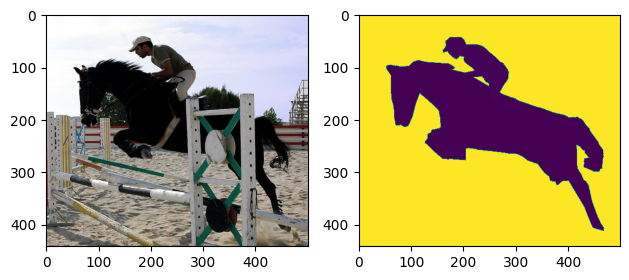

In [5]:
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(mask)
plt.tight_layout()

Text(0, 0.5, 'Frequency')

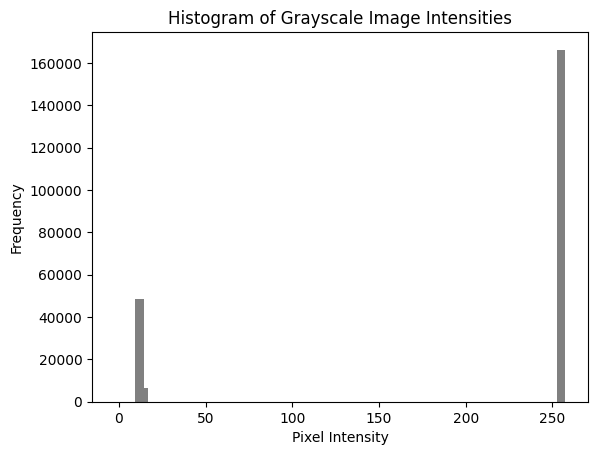

In [6]:
# Convert the PIL Image to a NumPy array
image_array = np.array(mask)
# Calculate the histogram
hist, bins = np.histogram(image_array.flatten(), bins=255, range=[0, 256])
plt.bar(bins[:-1], hist, width=5, color='gray')
plt.title('Histogram of Grayscale Image Intensities')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

0=background, 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle, 6=bus, 7=car, 8=cat, 9=chair, 10=cow, 11=diningtable,
12=dog, 13=horse, 14=motorbike, 15=person # 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor

In [7]:
np.unique(image_array.flatten())

array([ 13,  15, 255], dtype=uint8)

In [8]:
np.histogram(image_array.flatten(), bins=256, range=[0, 256])

(array([     0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,  48386,      0,   6289,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0, 